In [1]:
import warnings

warnings.filterwarnings(
    "ignore",
    ".*IProgress not found*",
)
warnings.simplefilter(action="ignore", category=FutureWarning)

from palmotif import compute_motif, svg_logo
import scanpy as sc
import dandelion as ddl
import scirpy as ir
import pandas as pd
import numpy as np
import seaborn as sb

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [3]:
# adata

In [4]:
adata=sc.read_h5ad("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [5]:
# vdjx = ddl.from_scirpy(adata)
# vdjx

Dandelion class object with n_obs = 31502 and n_contigs = 64661
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'c_call', 'consensus_count', 'duplicate_count', 'locus', 'cell_id', 'multi_chain', 'isotype', 'locus_status', 'chain_status', 'c_call_VDJ', 'Cellname', 'total_counts', 'c_call_VDJ_main', 'v_call_B_VDJ_main', 'majority_voting', 'v_call_VDJ', 'Last_cell_type_num', 'Cell_lineage', 'junction_aa_VDJ', 'c_call_B_VDJ', 'c_call_VJ', 'd_call_VDJ_main', 'j_call_VJ_main', 'duplicate_count_B_VDJ', 'j_call_VDJ_main', 'd_call_B_VDJ', 'v_call_VJ_main', 'v_call_B_VJ_main', 'Last_cell_type_num2', 'd_call_B_VDJ_main', 'j_call_B_VJ', 'j_call_B_VDJ', 'n_genes_by_counts', 'productive_B_VJ', 'changeo_clone_id_size_max_6', 'Week', 'AdjustedID', 'is_cell', 'doublet_scores', 'junction_aa_VJ', 'receptor_type', 'j_call_VDJ', 'TCRBCRlabel', 'leiden', 'locus

In [6]:
# vdjx.data["v_call"].replace("", np.nan, inplace=True)
# vdjx.data.dropna(subset=["v_call"], inplace=True)

# vdjx.data["j_call"].replace("", np.nan, inplace=True)
# vdjx.data.dropna(subset=["j_call"], inplace=True)

# vdjx.data["junction_aa"].replace("", np.nan, inplace=True)
# vdjx.data.dropna(subset=["junction_aa"], inplace=True)

# vdjx.data["junction_length"] = [len(a) for a in vdjx.data["junction_aa"]]

In [7]:
# ddl.pp.calculate_threshold(vdjx, model="hh_s5f", plot=False)
# vdjx.threshold

In [8]:
# ddl.tl.define_clones(vdjx, key_added="changeo_clone_id", model="hh_s5f")

In [9]:
# vdjx.write_pkl('./All_scanpyData/Data/Scanpy_lastCell_BCRall_vdjx.pkl')

In [10]:
# ddl.tl.generate_network(
#     vdjx, key="sequence_alignment", layout_method="sfdp", clone_key="changeo_clone_id"
# )

In [11]:
# vdjx.write_pkl('./All_scanpyData/Data/Scanpy_lastCell_BCRall_vdjx.pkl')

In [12]:
import pickle

with open('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_lastCell_BCRall_vdjx.pkl', 'rb') as f:
    vdjx= pickle.load(f)

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


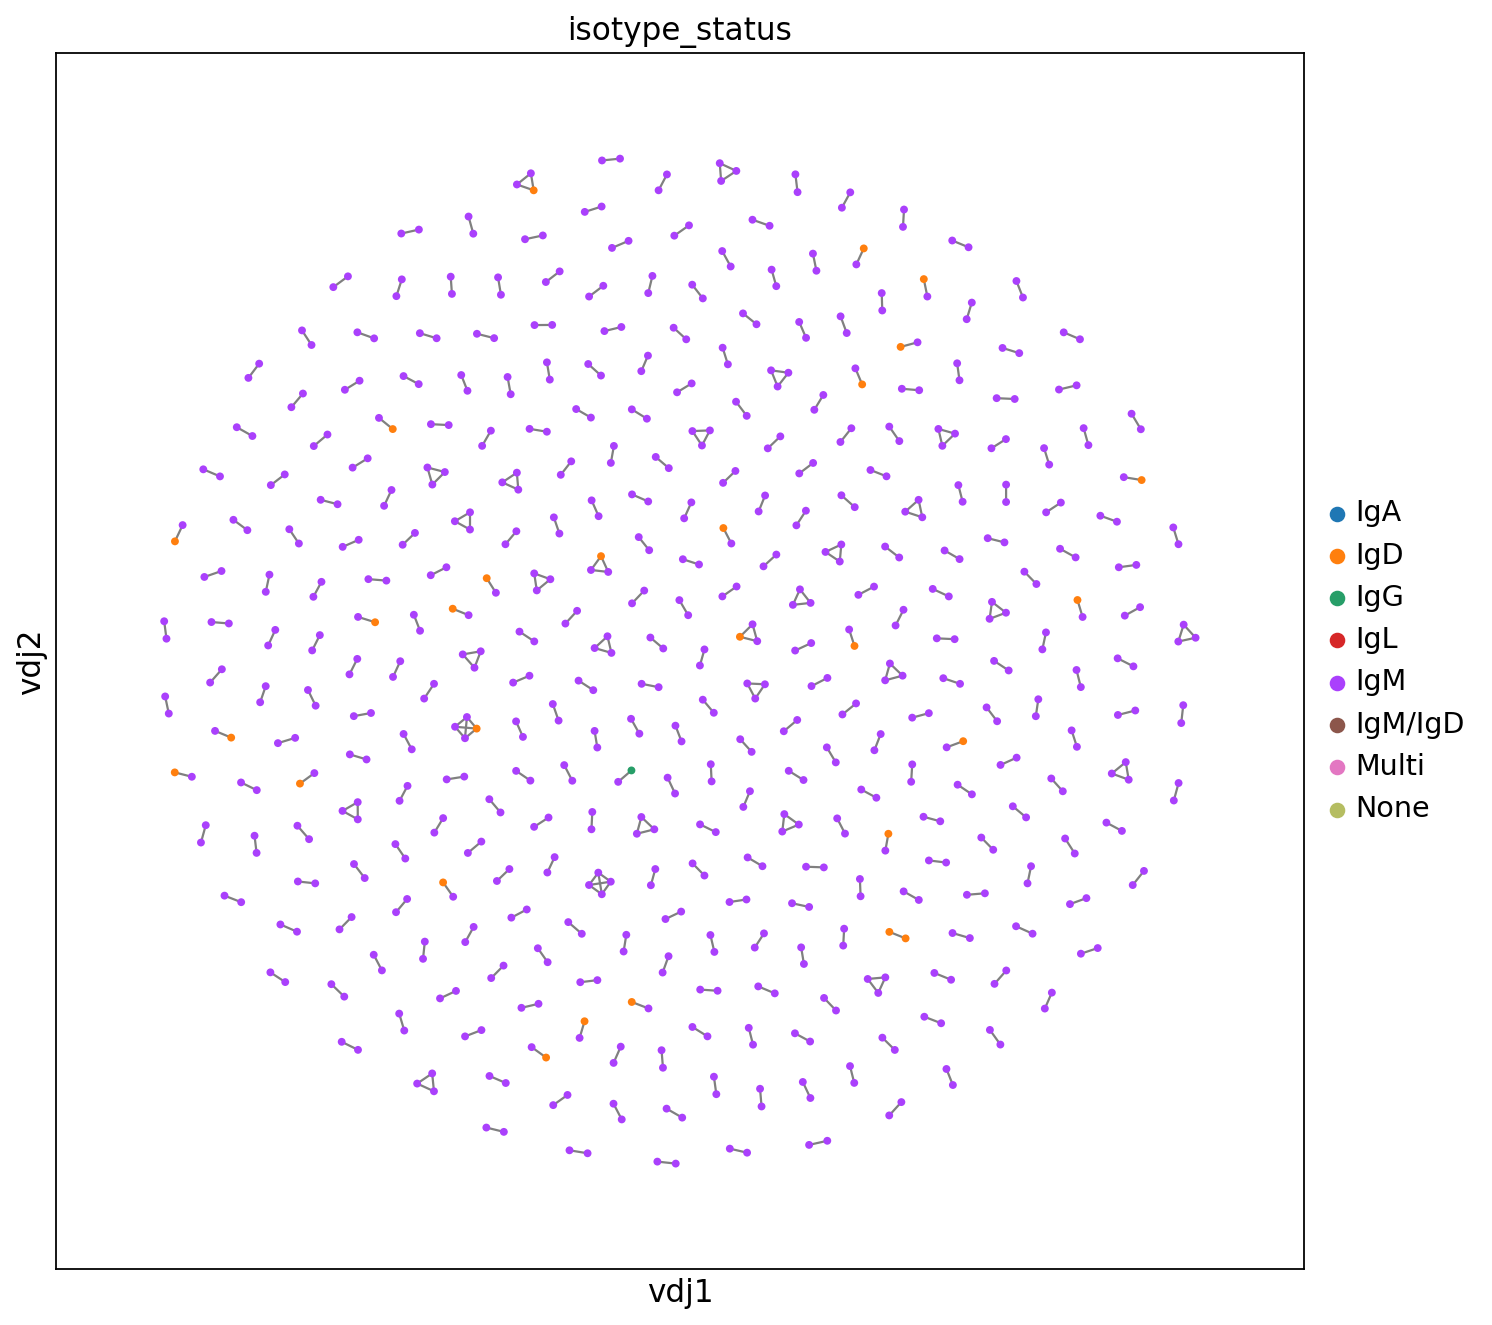

In [94]:
ddl.tl.transfer(adata, vdjx, clone_key="changeo_clone_id", expanded_only=True)

edgeweights = [
    1 / (e + 1) for e in ddl.tl.extract_edge_weights(vdjx)
]  # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
# therefore, the thicker the line, the shorter the edit distance.

sc.set_figure_params(figsize=[10, 10])
_ = ddl.pl.clone_network(
    adata,
    color=["isotype_status"],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,show=False
)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5D_isotype_status.pdf", bbox_inches='tight')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


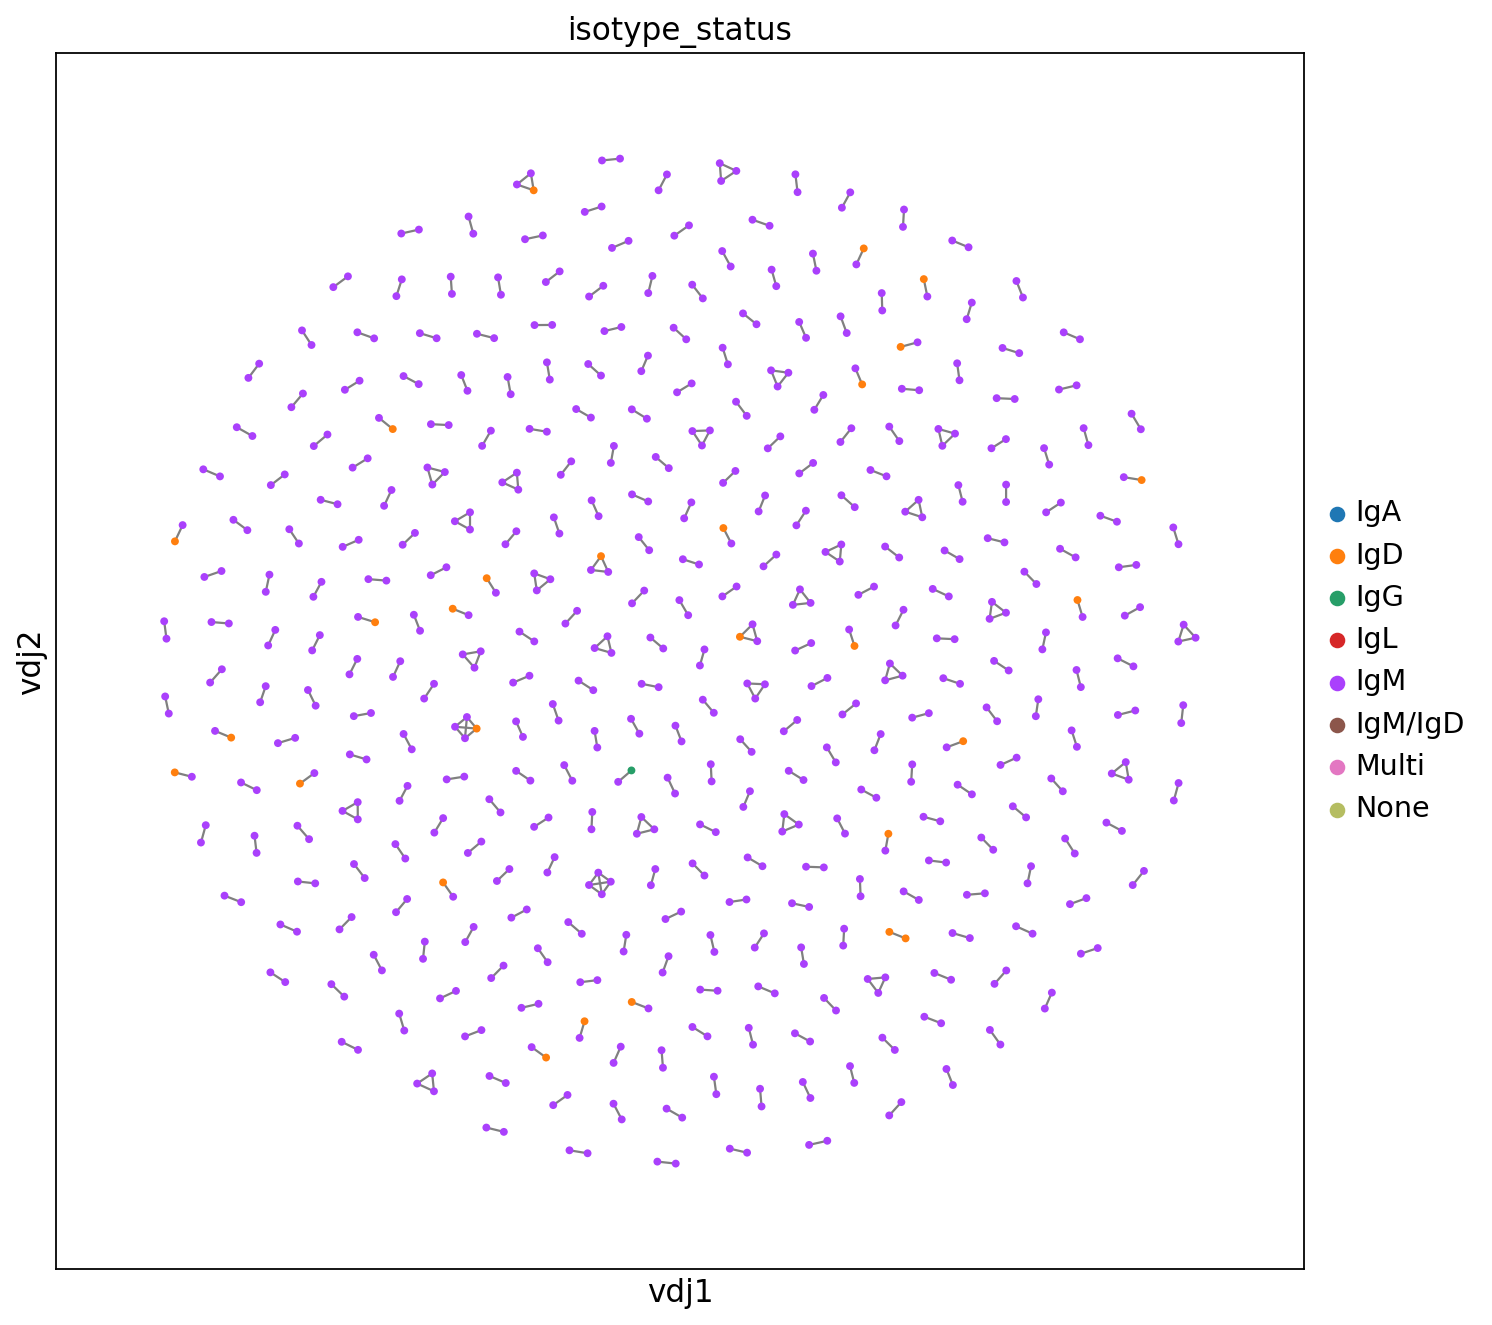

In [92]:
sc.set_figure_params(figsize=[10, 10])
sc.pl.embedding(adata, basis='vdj', edges=True,color="isotype_status", legend_fontoutline=3, edges_width=edgeweights,size=50,show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5D_isotype_status.pdf", bbox_inches='tight')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


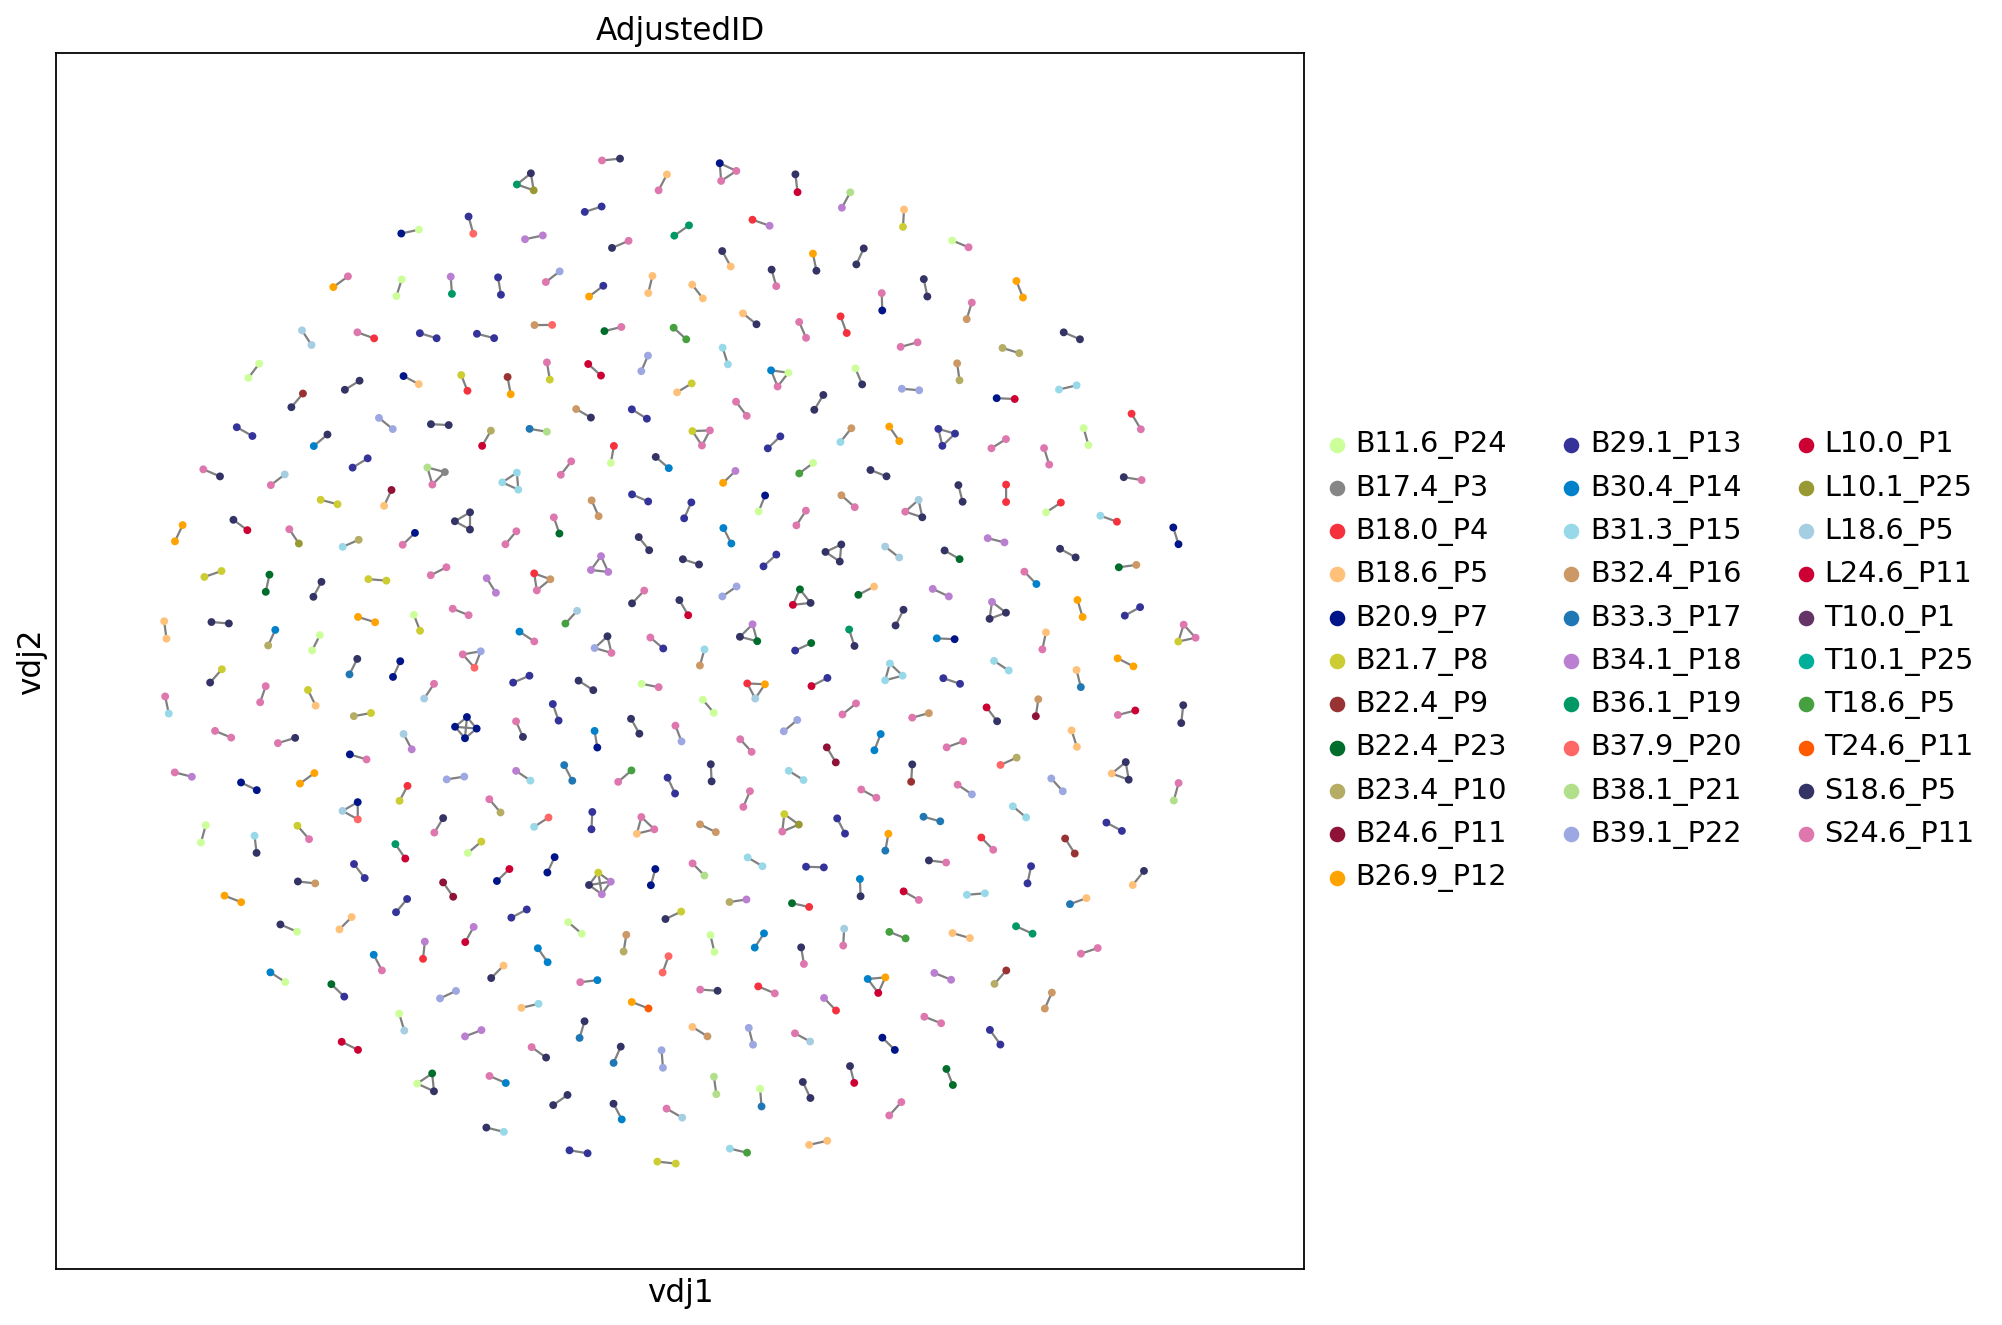

In [91]:
sc.set_figure_params(figsize=[10, 10])
_ = ddl.pl.clone_network(
    adata,
    color=["AdjustedID"],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,show=False
)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33H_sample_status.pdf", bbox_inches='tight')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


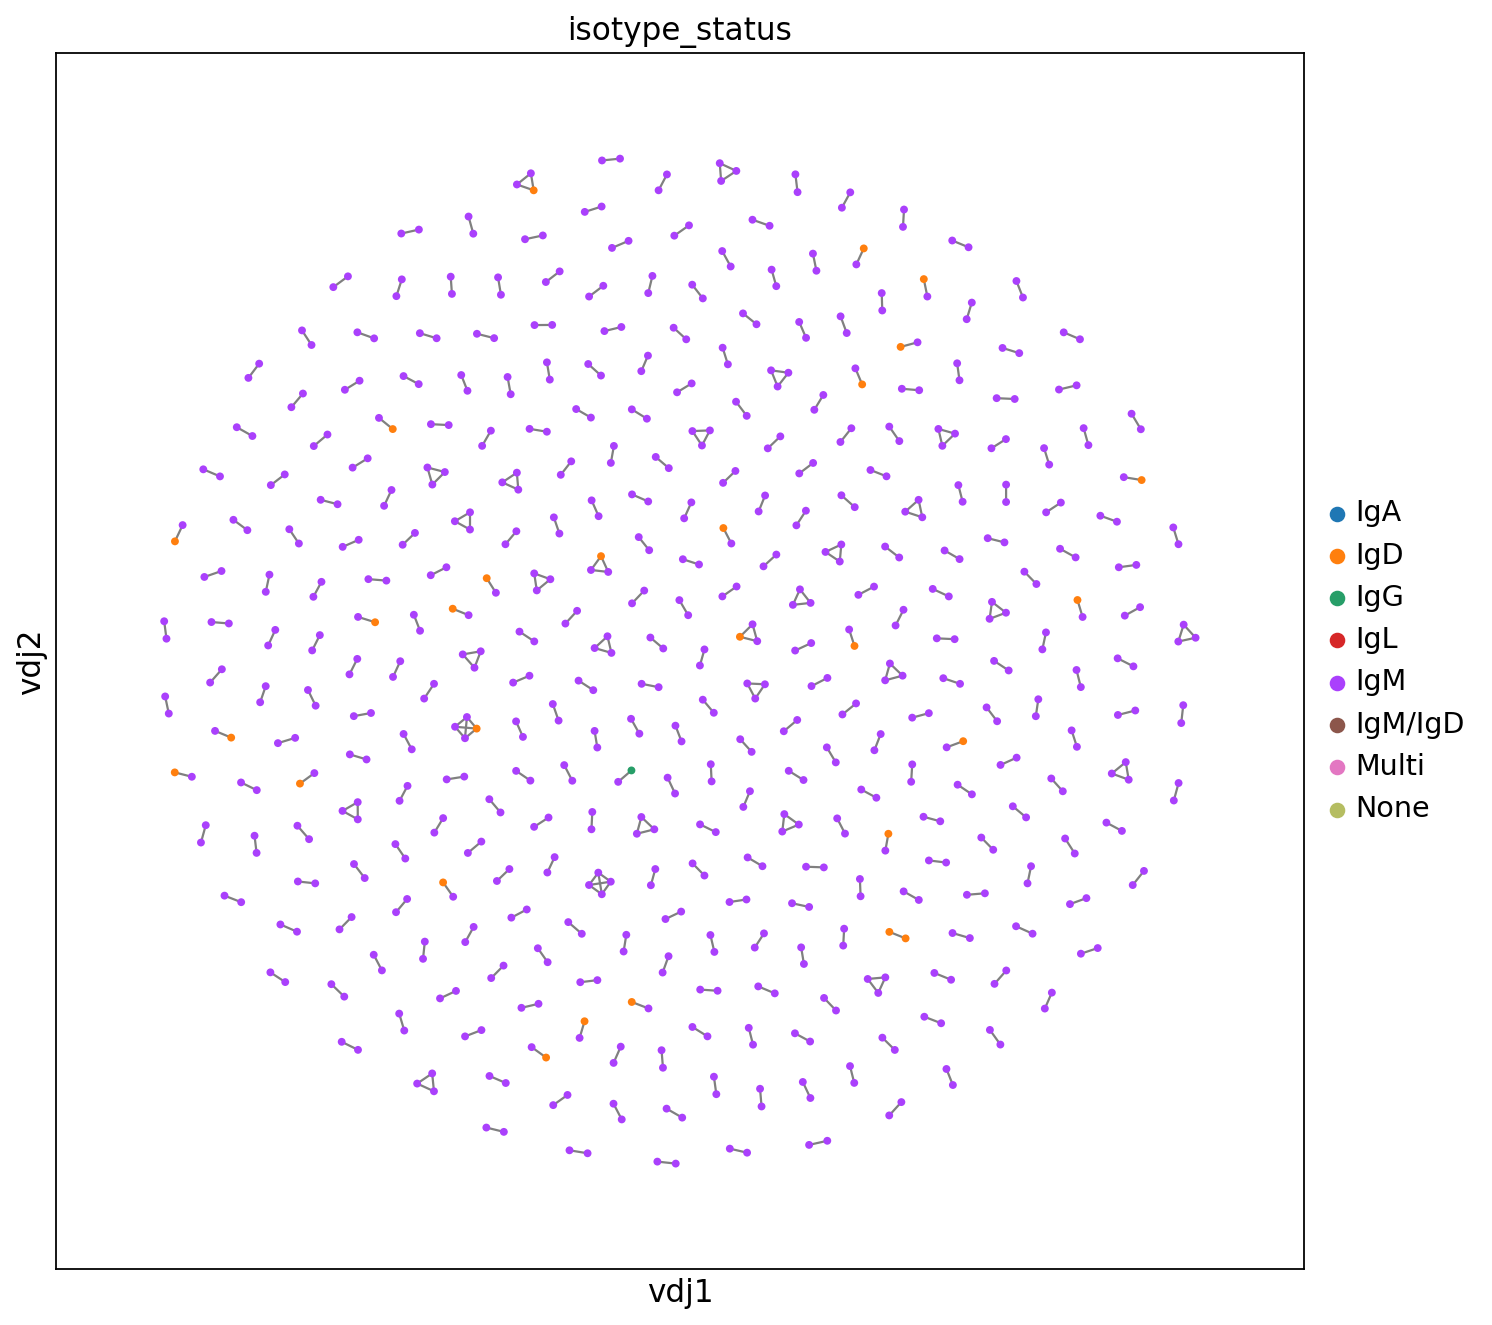

In [15]:
sc.set_figure_params(figsize=[10, 10])
_ = ddl.pl.clone_network(
    adata,
    color=['isotype_status'],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,
)

In [40]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


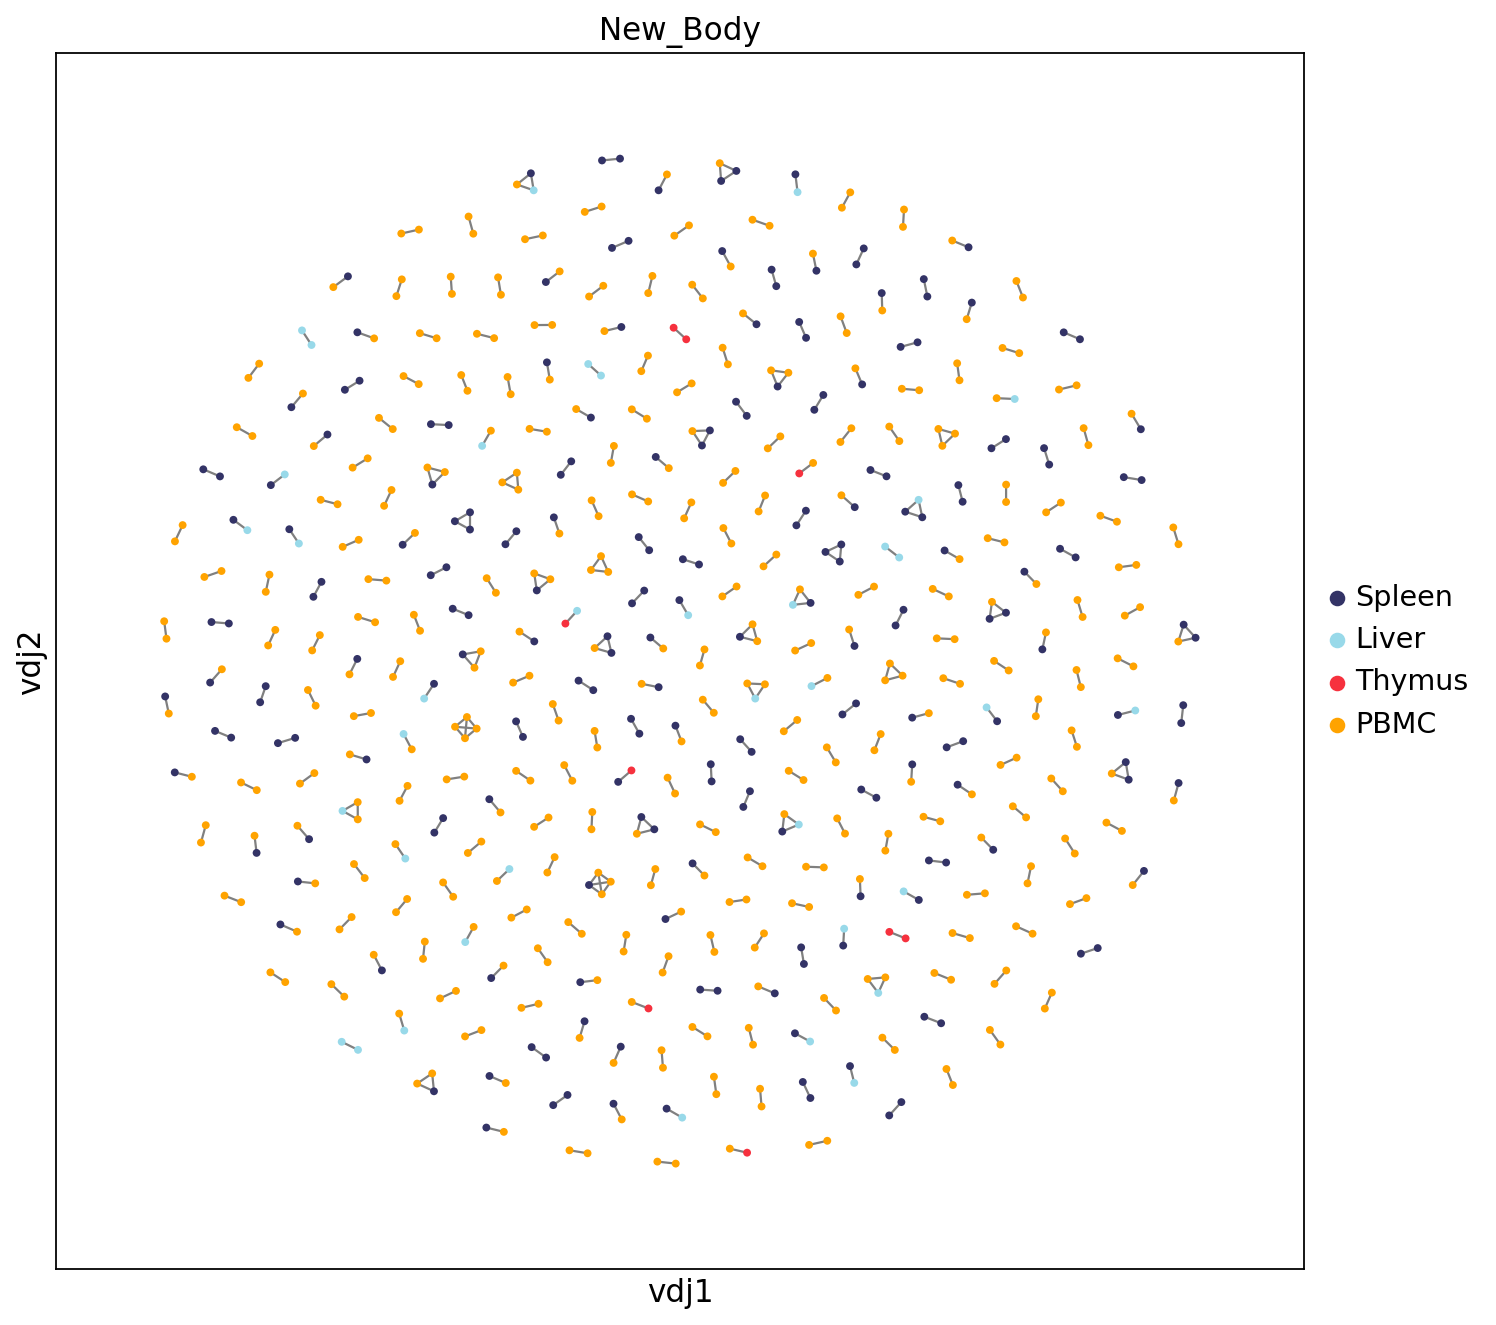

In [46]:
from scanpy.plotting._tools.scatterplots import embedding
embedding(adata, basis='vdj', color='New_Body',edges=True,legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33F_organ_status.pdf", bbox_inches='tight')

In [17]:
adata.obsm['X_vdj'].shape

(31502, 2)

In [18]:
import pandas as pd


vdj_data = adata.obsm['X_vdj']
vdj_df = pd.DataFrame(vdj_data)
vdj_df = vdj_df.dropna()
vdj_df.index

Int64Index([   15,   156,   204,   242,   586,   640,   691,   707,   802,
              878,
            ...
            30748, 30760, 30781, 30881, 30904, 30980, 31172, 31319, 31343,
            31380],
           dtype='int64', length=680)

In [19]:

adatasub = adata.obs.iloc[vdj_df.index, :]
adatasub2=adata[adatasub.index]
adatasub2

View of AnnData object with n_obs × n_vars = 680 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction

In [20]:

embedding = adatasub2.obsm['X_vdj']
connectivities = adatasub2.uns['neighbors']['connectivities']
connectivities_dense = connectivities.toarray()
edges = np.transpose(connectivities.nonzero())
edges.shape

(774, 2)

In [21]:
import pandas as pd


index_to_label = pd.Series(adatasub2.obs["New_Body"].values, index=adatasub2.obs.index)


edges_labels = []
for index1, index2 in edges:
    edges_labels.append('-'.join([index_to_label[index1], index_to_label[index2]]))
edges_labels_series = pd.Series(edges_labels)
connections_counts = edges_labels_series.value_counts()
connections_counts_df =connections_counts.reset_index()
connections_counts_df.columns = ['Connection', 'Count']
print(connections_counts_df)
# print(connections_counts)

       Connection  Count
0       PBMC-PBMC    370
1   Spleen-Spleen    134
2     PBMC-Spleen     89
3     Spleen-PBMC     89
4    Spleen-Liver     18
5    Liver-Spleen     18
6      PBMC-Liver     17
7      Liver-PBMC     17
8     Liver-Liver      8
9   Thymus-Thymus      4
10    Thymus-PBMC      3
11    PBMC-Thymus      3
12  Thymus-Spleen      1
13   Thymus-Liver      1
14   Liver-Thymus      1
15  Spleen-Thymus      1


In [48]:
%%R
source("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/color.R")

In [51]:
 connections_counts_df 

,Connection,Count
0,PBMC-PBMC,370
1,Spleen-Spleen,134
2,PBMC-Spleen,89
3,Spleen-PBMC,89
4,Spleen-Liver,18
5,Liver-Spleen,18
6,PBMC-Liver,17
7,Liver-PBMC,17
8,Liver-Liver,8
9,Thymus-Thymus,4


Saving 6.67 x 6.67 in image


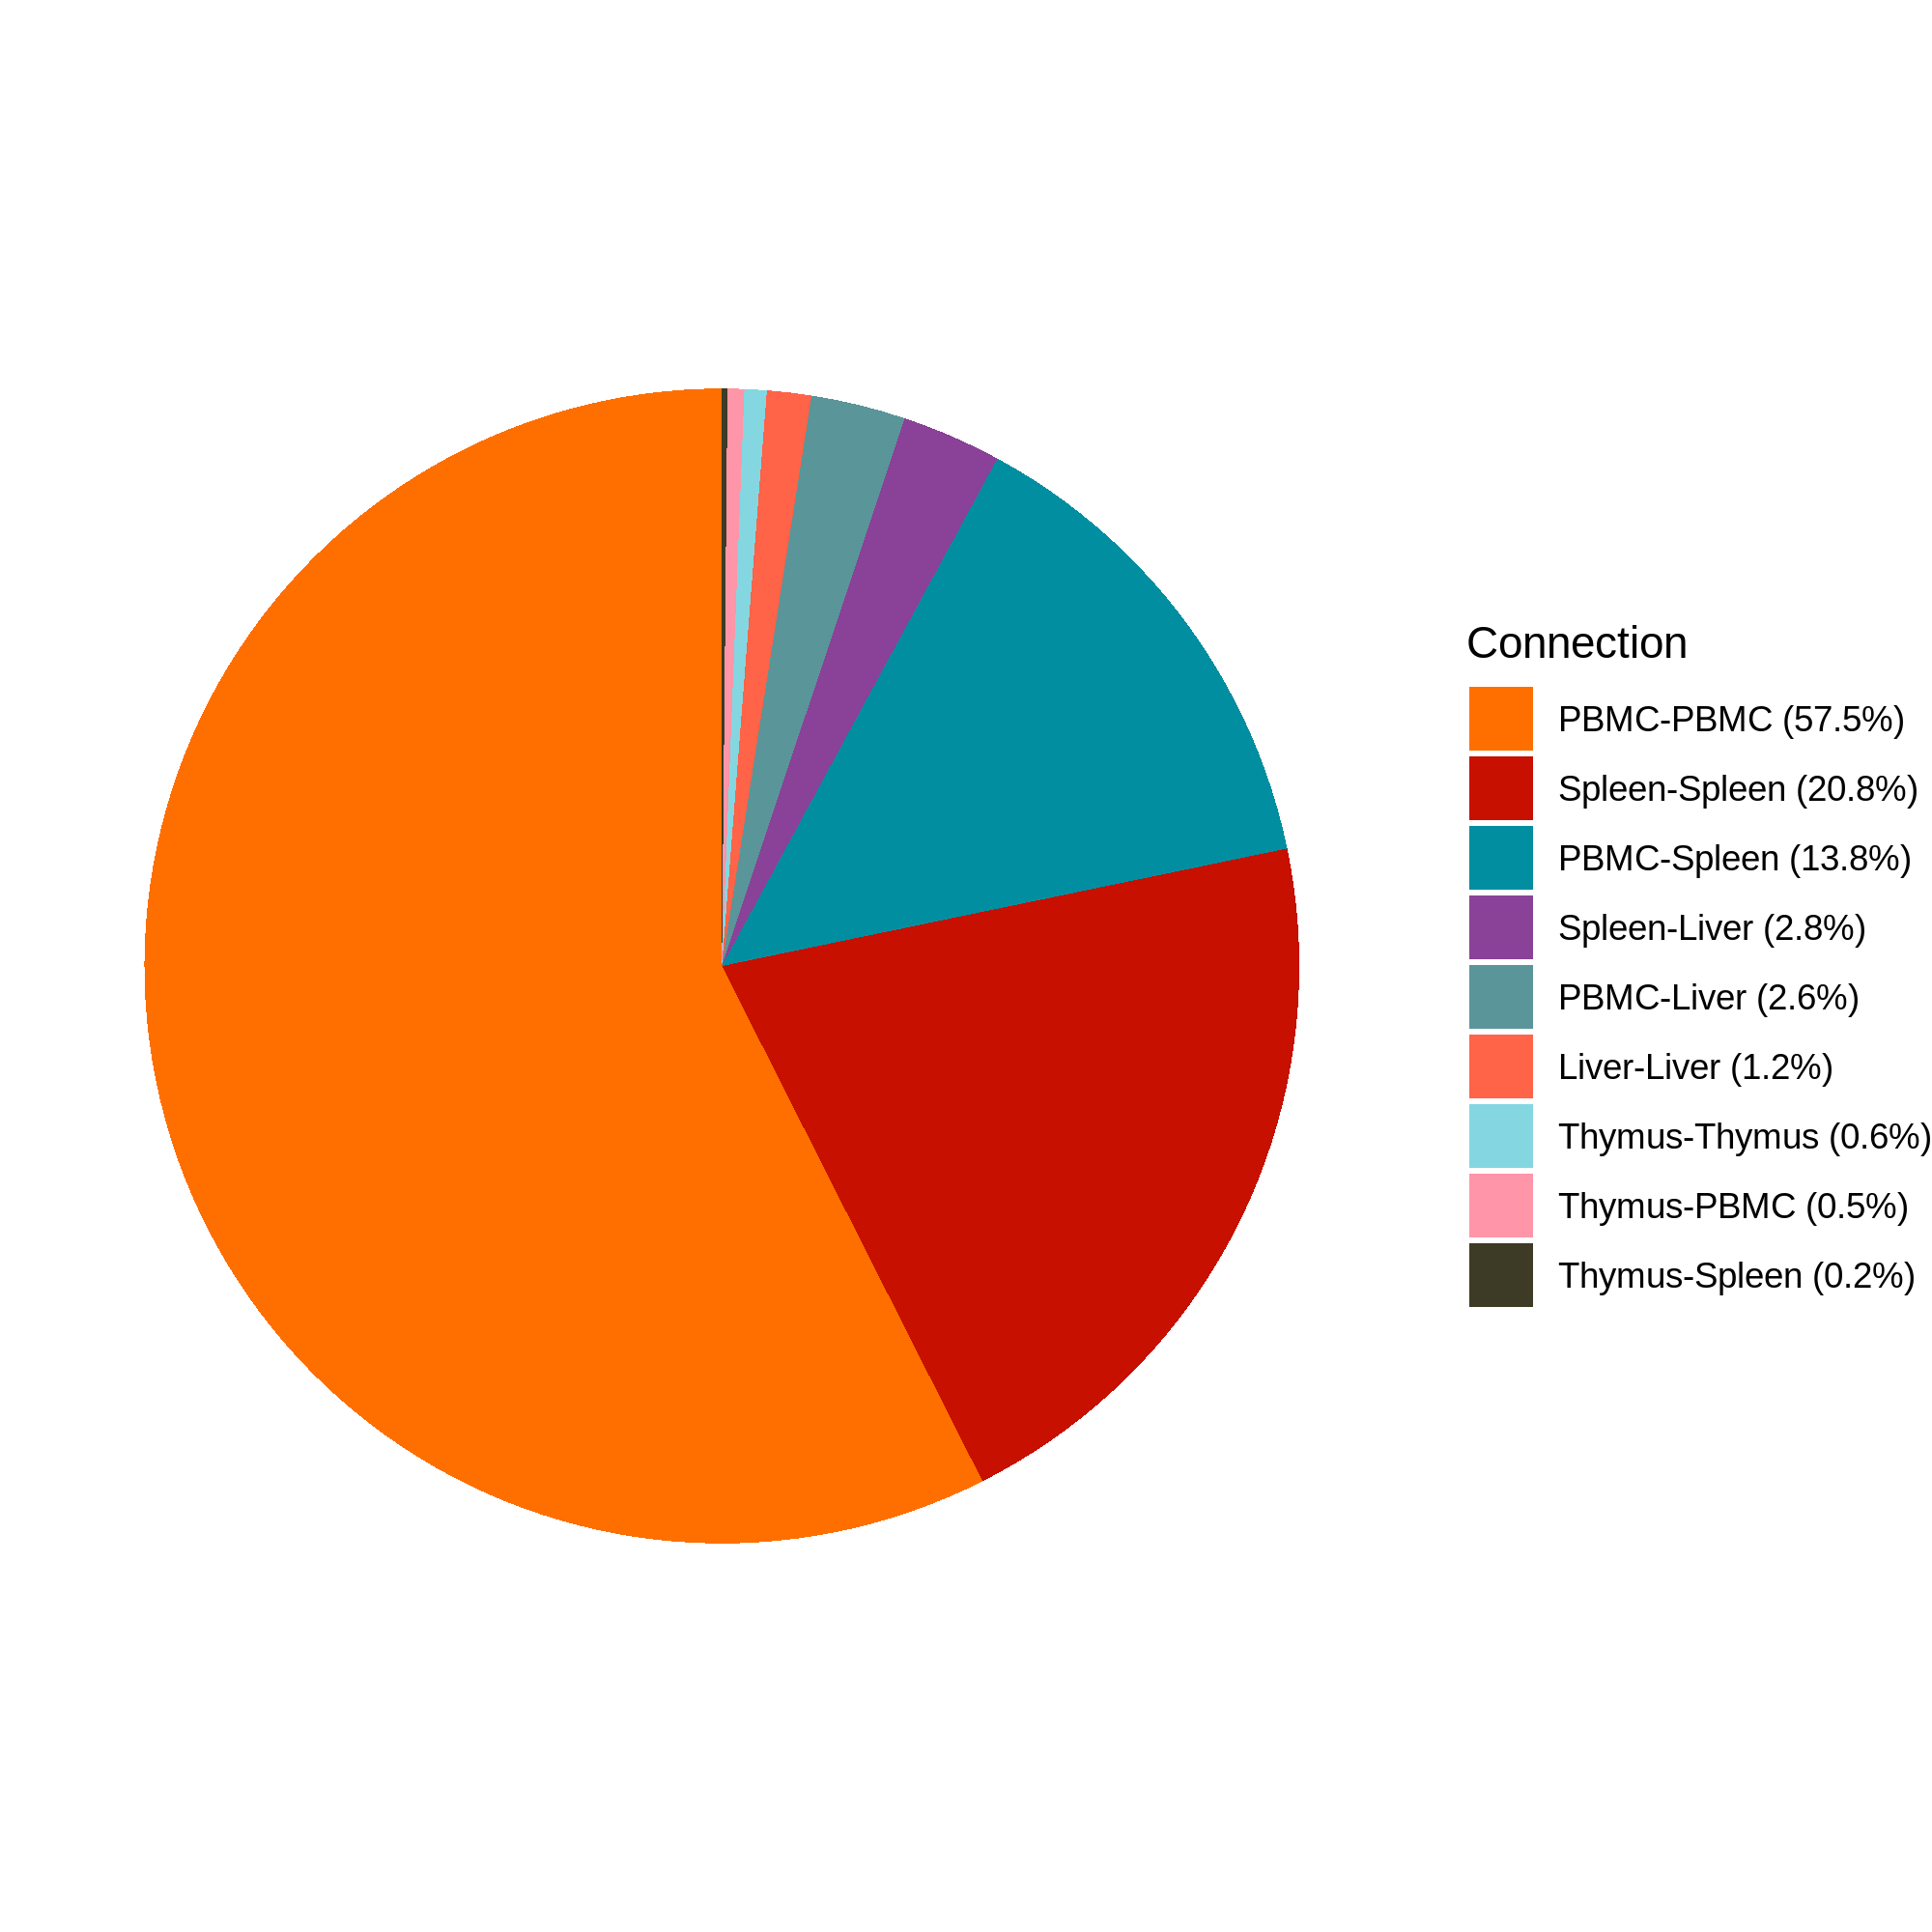

In [87]:
%%R -i connections_counts_df -w 2000 -h 2000 -r 300
connections_counts_df<-connections_counts_df[!duplicated(connections_counts_df$Count),]
head(connections_counts_df)
library(ggplot2)
library(dplyr)
library(ggsci)

connections_counts_df$Percentage <- connections_counts_df$Count / sum(connections_counts_df$Count)

connections_counts_df <- connections_counts_df %>% arrange(desc(Count))

connections_counts_df$Cumulative_Percentage <- cumsum(connections_counts_df$Percentage) - connections_counts_df$Percentage / 2


connections_counts_df$Label <- ifelse(row_number(connections_counts_df$Count) <= 3, 
                                      paste0(round(connections_counts_df$Percentage*100, 1), "%"), 
                                      "")
connections_counts_df$Connection <- paste(connections_counts_df$Connection, " (", round(connections_counts_df$Percentage*100, 1), "%)", sep="")

connections_counts_df <- connections_counts_df %>% arrange(desc(Percentage))


connections_counts_df$Connection <- factor(connections_counts_df$Connection, levels = connections_counts_df$Connection)


pie2 <- ggplot(connections_counts_df, aes(x = "", y = Count, fill = Connection)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "right")+scale_fill_futurama()

print(pie2)
ggsave(plot=pie2,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33G_organ_status_pie.pdf")
# print(pie)

In [23]:
import pandas as pd


index_to_label = pd.Series(adatasub2.obs["AdjustedID"].values, index=adatasub2.obs.index)


edges_labels = []
for index1, index2 in edges:
    edges_labels.append('-'.join([index_to_label[index1], index_to_label[index2]]))
edges_labels_series = pd.Series(edges_labels)
IDconnections_counts = edges_labels_series.value_counts()
IDconnections_counts_df =IDconnections_counts.reset_index()
IDconnections_counts_df.columns = ['Connection', 'Count']
print(IDconnections_counts_df)
# print(IDconnections_counts)

              Connection  Count
0    B29.1_P13-B29.1_P13     58
1      S18.6_P5-S18.6_P5     56
2    S24.6_P11-S24.6_P11     48
3    B31.3_P15-B31.3_P15     26
4      B20.9_P7-B20.9_P7     24
..                   ...    ...
232  B24.6_P11-B32.4_P16      1
233  B30.4_P14-B26.9_P12      1
234  B30.4_P14-L24.6_P11      1
235  B30.4_P14-B23.4_P10      1
236   B22.4_P23-B18.0_P4      1

[237 rows x 2 columns]


In [61]:
# edges_labels
len(edges)

774

In [65]:
IDconnections_counts.reset_index()

,index,0
0,B29.1_P13-B29.1_P13,58
1,S18.6_P5-S18.6_P5,56
2,S24.6_P11-S24.6_P11,48
3,B31.3_P15-B31.3_P15,26
4,B20.9_P7-B20.9_P7,24
...,...,...
232,B24.6_P11-B32.4_P16,1
233,B30.4_P14-B26.9_P12,1
234,B30.4_P14-L24.6_P11,1
235,B30.4_P14-B23.4_P10,1


Saving 6.67 x 6.67 in image


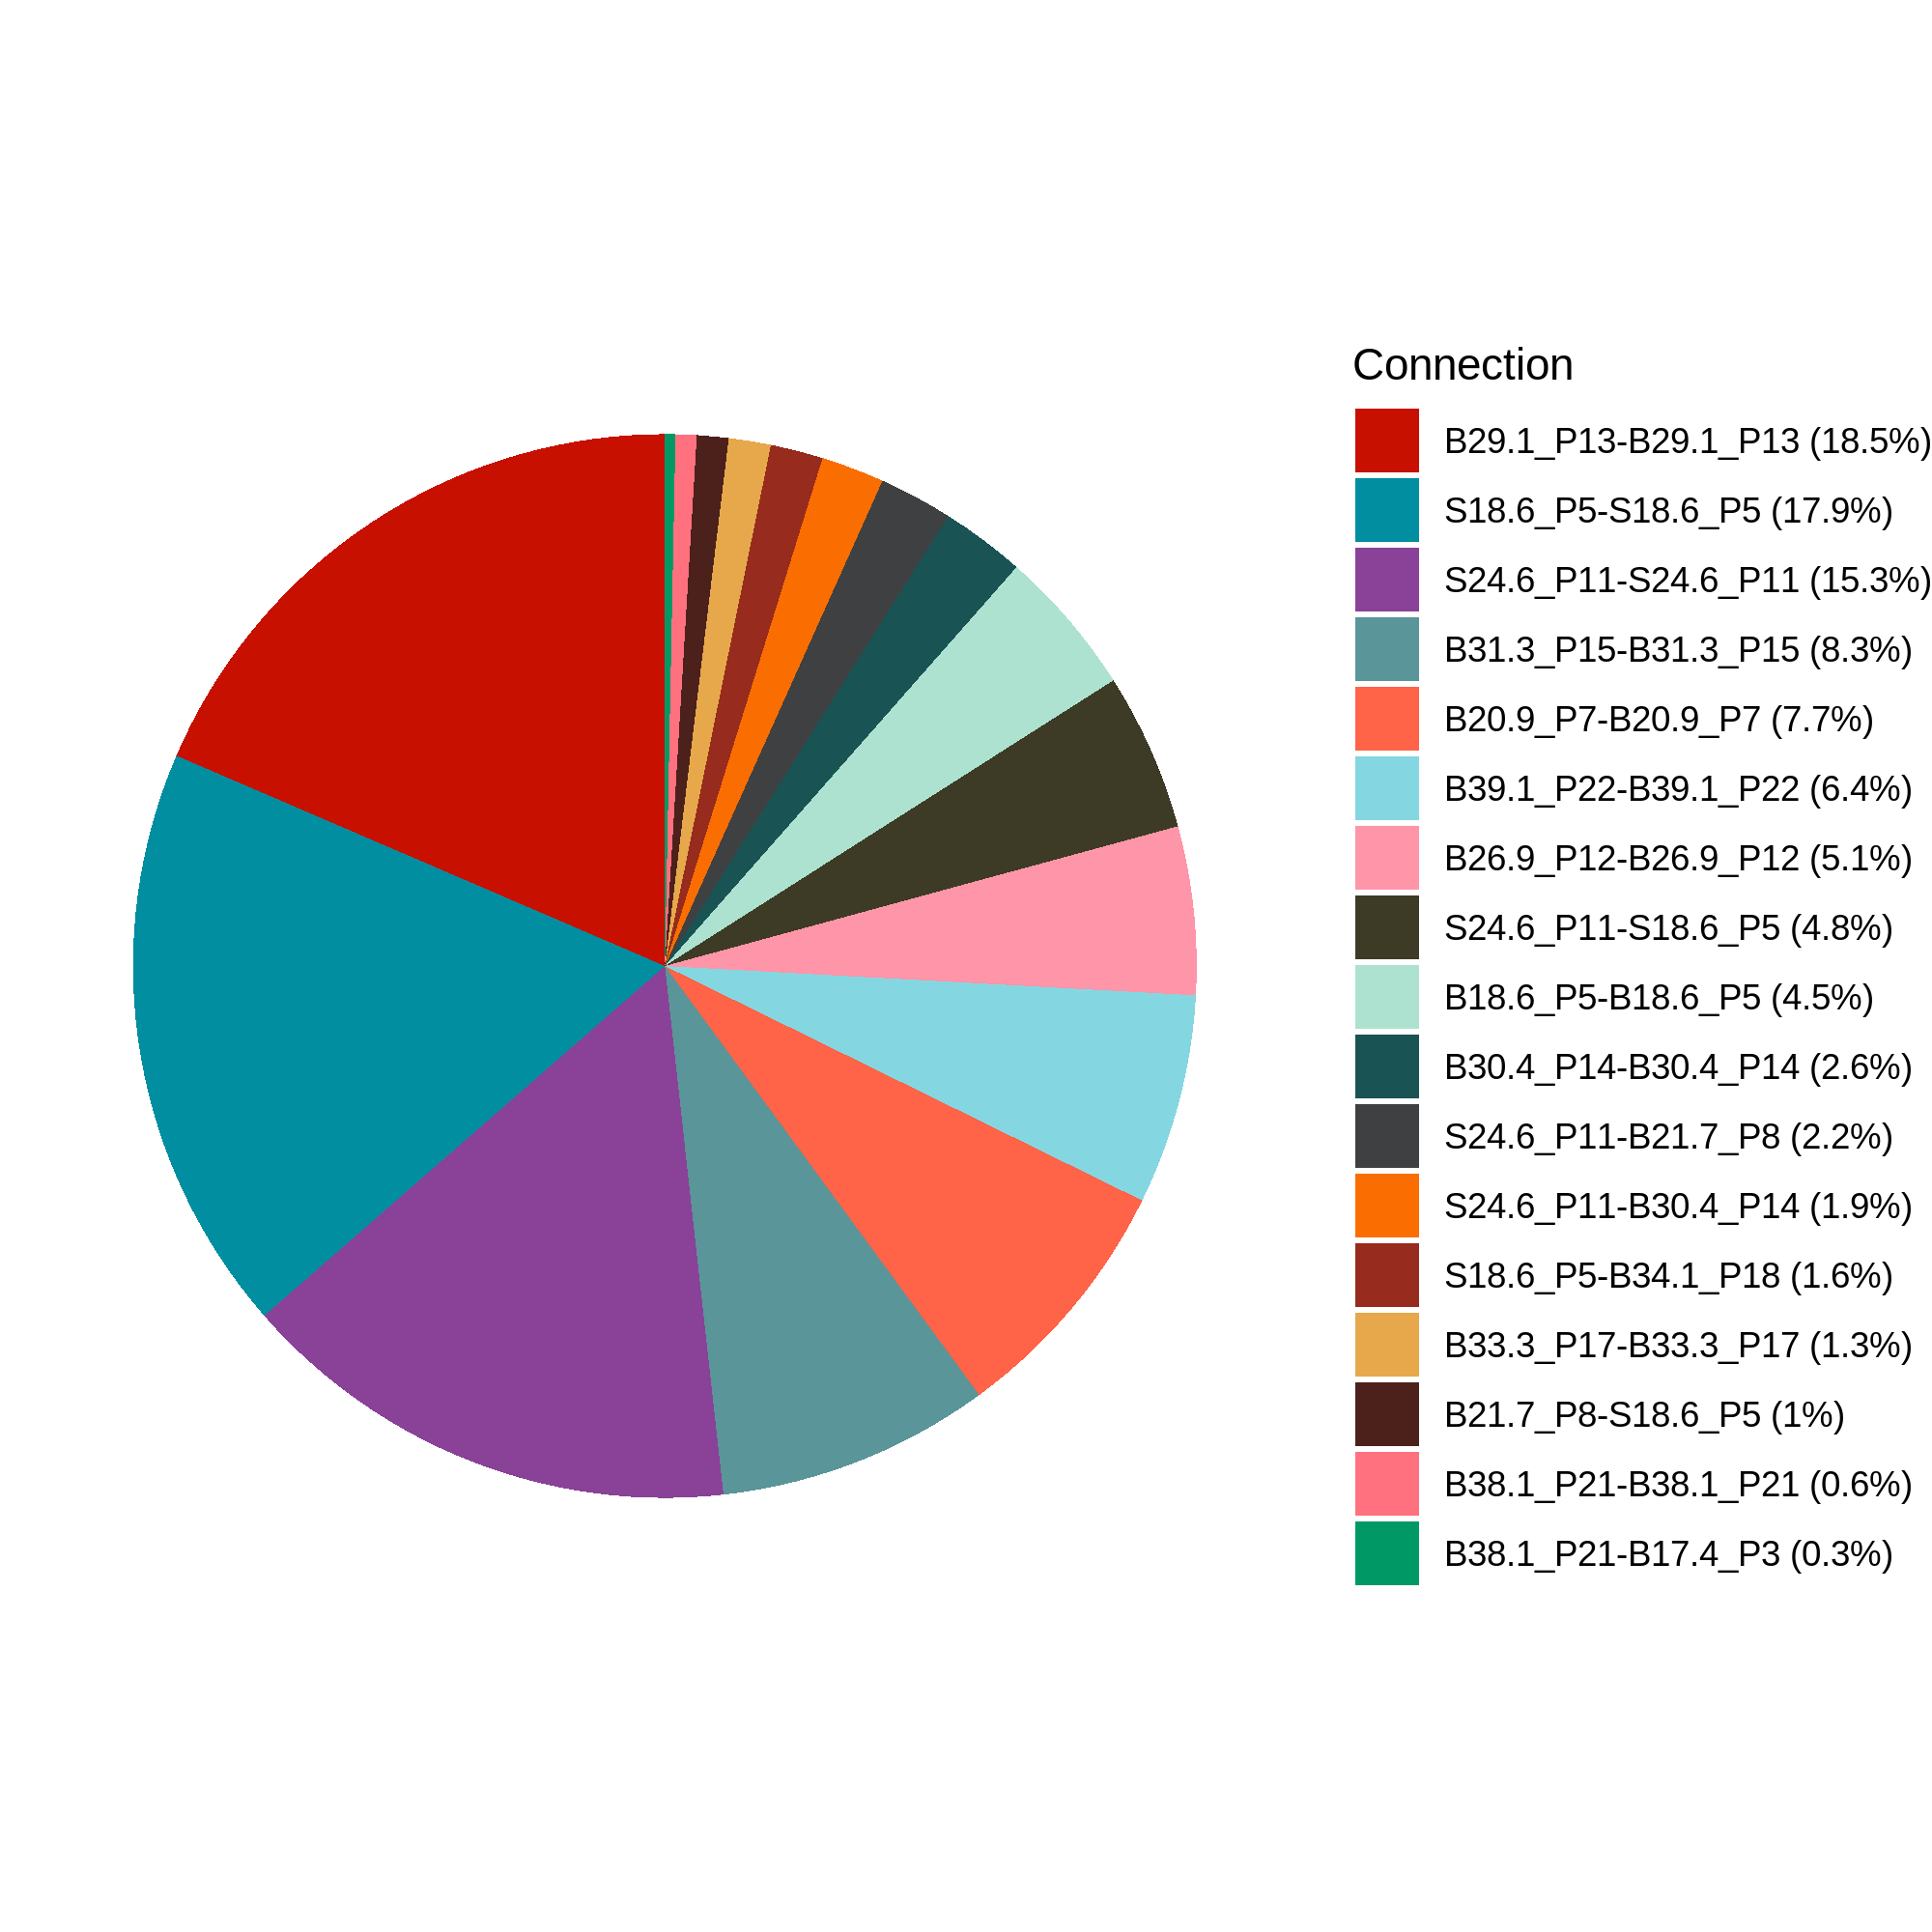

In [89]:
%%R -i IDconnections_counts_df -w 2000 -h 2000 -r 300
library(ggplot2)
library(dplyr)
library(ggsci)

create_pie_chart <- function(connections_counts_df) {

  connections_counts_df <- connections_counts_df[!duplicated(connections_counts_df$Count),]
  connections_counts_df$Percentage <- connections_counts_df$Count / sum(connections_counts_df$Count)
  connections_counts_df <- connections_counts_df %>% arrange(desc(Count))
  connections_counts_df$Cumulative_Percentage <- cumsum(connections_counts_df$Percentage) - connections_counts_df$Percentage / 2
  connections_counts_df$Label <- ifelse(row_number(connections_counts_df$Count) <= 3, 
                                        paste0(round(connections_counts_df$Percentage*100, 1), "%"), 
                                        "")
  connections_counts_df$Connection <- paste(connections_counts_df$Connection, " (", round(connections_counts_df$Percentage*100, 1), "%)", sep="")
  connections_counts_df <- connections_counts_df %>% arrange(desc(Percentage))

  connections_counts_df$Connection <- factor(connections_counts_df$Connection, levels = connections_counts_df$Connection)

  pie <- ggplot(connections_counts_df, aes(x = "", y = Count, fill = Connection)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start = 0) +
    theme_void() +
    theme(legend.position = "right") +scale_fill_manual(values=colname4)
#     scale_fill_futurama()

  print(pie)
    return(pie)
}

pi3=create_pie_chart(IDconnections_counts_df)
ggsave(plot=pi3,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33I_organ_status_pie.pdf")

In [77]:
import pandas as pd


index_to_label = pd.Series(adatasub2.obs["isotype_status"].values, index=adatasub2.obs.index)


edges_labels = []
for index1, index2 in edges:
    edges_labels.append('-'.join([index_to_label[index1], index_to_label[index2]]))
edges_labels_series = pd.Series(edges_labels)
ISOconnect_counts = edges_labels_series.value_counts()
ISOconnect_counts_df =ISOconnect_counts.reset_index()
ISOconnect_counts_df.columns = ['Connection', 'Count']
ISOconnect_counts_df

ISOconnect_counts_df= ISOconnect_counts_df.loc[~ISOconnect_counts_df['Connection'].isin(['IgG-IgM', 'IgM-IgG'])]
print(ISOconnect_counts_df)
# print(ISOconnect_counts)

  Connection  Count
0    IgM-IgM    708
1    IgM-IgD     31
2    IgD-IgM     31
3    IgD-IgD      2


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Saving 3.33 x 3.33 in image


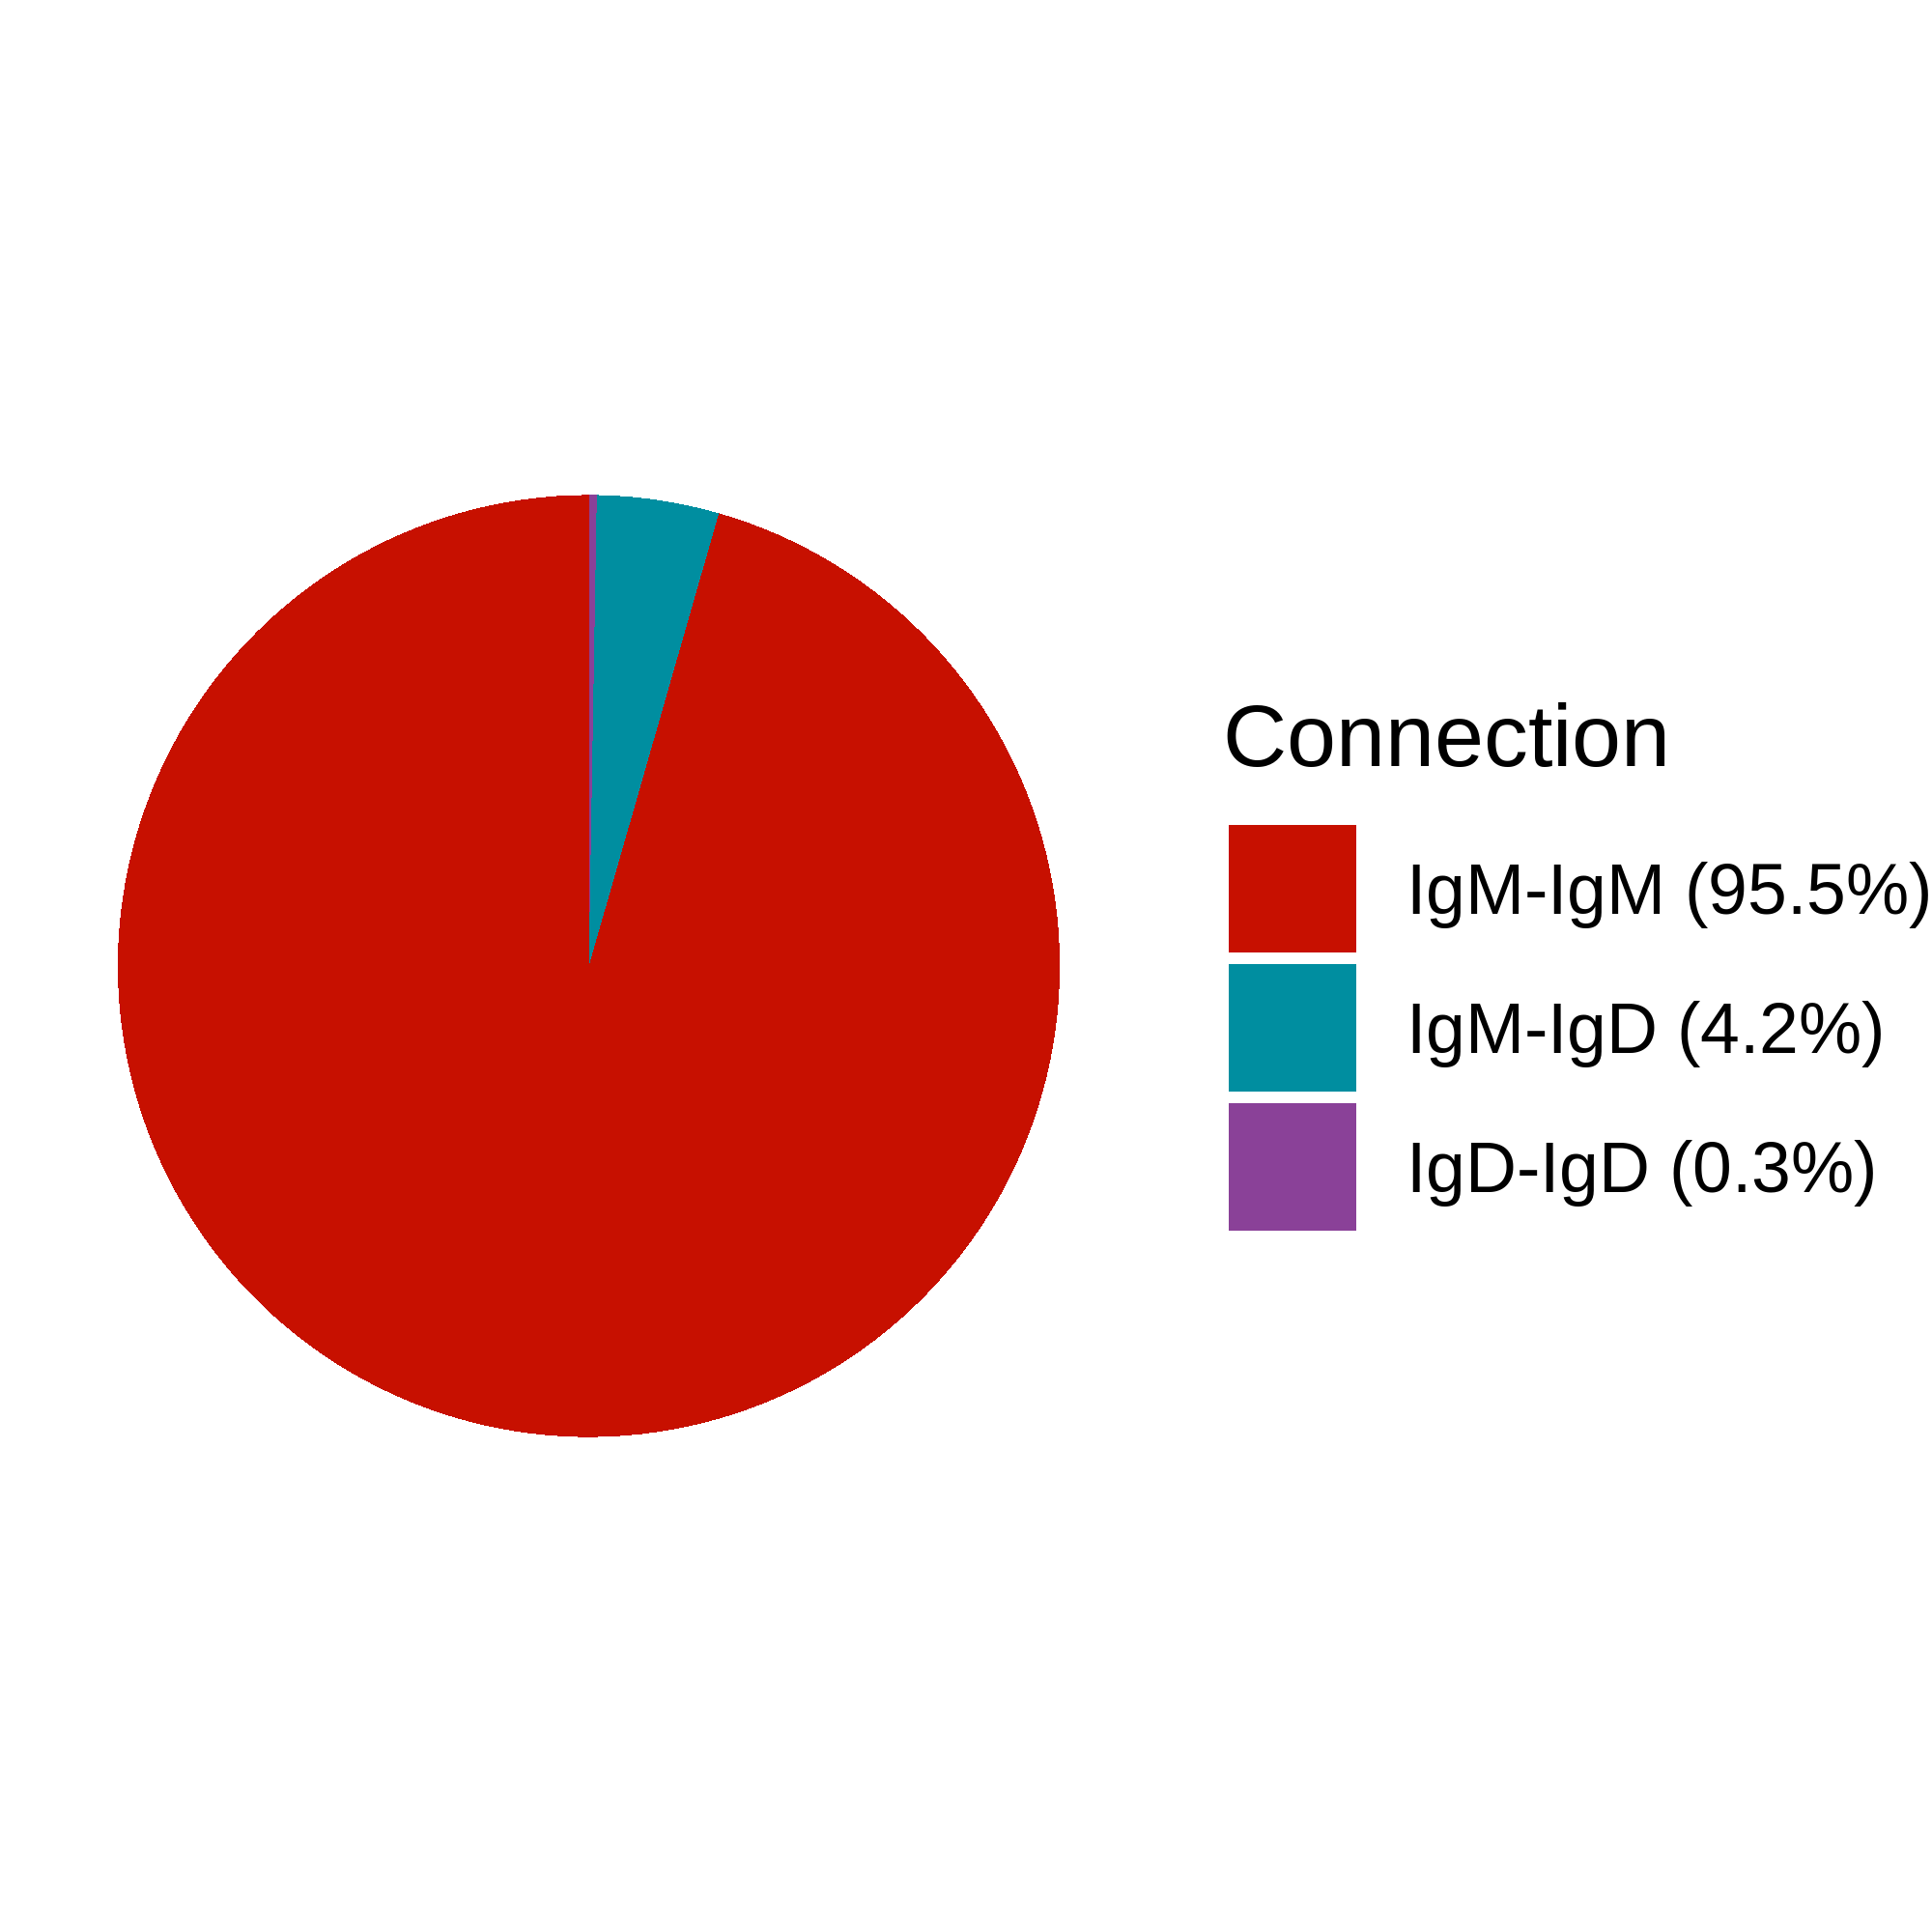

In [80]:
%%R -i ISOconnect_counts_df -w 2000 -h 2000 -r 600
create_pie_chart(ISOconnect_counts_df)+scale_fill_manual(values=col1)
ggsave("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5F_connect_stat.pdf")

In [83]:
%run ~/Main_Gao_ScanpyProject20231130/HFB_script_in_save/Color.py

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


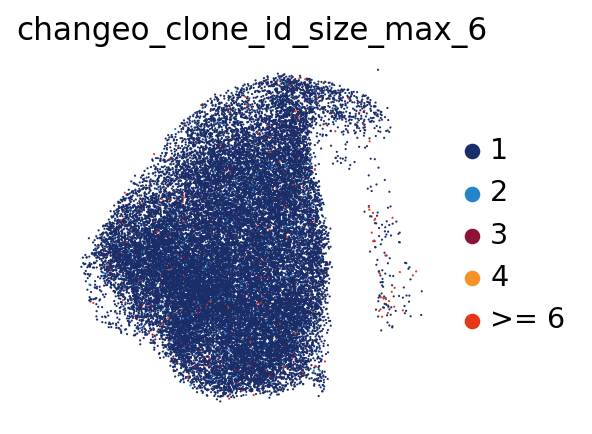

In [116]:
sc.set_figure_params(figsize=[3, 3])
seqcolor2_byr=["#1a2d69","#2685c9","#8F1336","#f49128","#e73718"]
sc.pl.umap(adata,color=['changeo_clone_id_size_max_6'],frameon=False,show=False,palette= create_palette(  adata.obs['changeo_clone_id_size_max_6'].cat.categories.to_list(),seqcolor2_byr))
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33C_clone_id_size_max_6.pdf",bbox_inches='tight')

In [112]:
 adata.obs['changeo_clone_id_size_max_6'].cat.categories.to_list()

['1', '2', '3', '4', '>= 6']